
# Import packages and directories necessary for this book

In [107]:
import sys
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
# from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
!pip install mixed-naive-bayes
from mixed_naive_bayes import MixedNB
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/drive/MyDrive/ColabNotebooks/modules')
import drive.MyDrive.ColabNotebooks.modules.helperFunctions

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocess the Data into a workable DataFrame

## Import the hepler functions and process the data

In [108]:
# Import the support function "readFile". This function takes as an argument a .cvs file or the route to the file, imports and transforms it into a Pandas DataFrame, returning the loaded DataFrame
from drive.MyDrive.ColabNotebooks.modules.helperFunctions import readFile

# Import the support function "cleanMissingValues". This function takes the DataFrame as an argument and returns the same DataFrame with a treatment for the missing values. 
from drive.MyDrive.ColabNotebooks.modules.helperFunctions import cleanMissingValues

# Import the support function "cleanDataFrame". This function takes in the previous DataFrame and returns another DataFrame whit just the features and target, rearanged in a new better comprehensive column order.
from drive.MyDrive.ColabNotebooks.modules.helperFunctions import cleanDataFrame

# Import the support function "convertCategories". This function takes in the previous DataFrame and returns another with new categorization for some of the features. 
from drive.MyDrive.ColabNotebooks.modules.helperFunctions import convertCategories

# Import "useLabelEncoder". This function takes in the DataFrame and applies sklearn labelEncoder to finis formating the DataFrame
from drive.MyDrive.ColabNotebooks.modules.helperFunctions import useLabelEncoder

In [109]:
# Read the .csv file and assigns the name "df" to it.
# After that, we apply the support functions to the DataFrame in order to ger a new df ready to work with in the next ML algorithms

file = 'drive/MyDrive/ColabNotebooks/data/VPD_lowerMainLand.csv'
df = readFile(file)
df = cleanMissingValues(df)
df = cleanDataFrame(df)
df = convertCategories(df)
df.head(5)

,Month,Weather,Light,Alcohol Involved,Drug Involved,Fell Asleep,Cyclist Involved,Pedestrian Involved,Motorcycle Involved,Land Use,Speed Advisory,Traffic Control,Traffic Flow,Road Class,Road Character,Road Condition,Road Surface,Crash Type
0,10,0,0,0,0,0,0,0,0,0,0,7,1,0,0,1,1,1
1,2,0,0,0,0,0,0,0,0,1,0,5,1,1,0,0,0,0
2,6,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,9,0,0,0,0,0,0,0,0,5,0,0,1,1,0,0,0,1
4,8,0,1,0,0,0,0,0,0,0,0,0,1,1,1,6,0,1


In [110]:
# We check for the shape of our preprocessed data
df.shape

(91868, 18)

## Start defining the "X" and "y" for the MixMax escaled dfX dfy and the same for the dummy variablesmodel.

### For the regular variables

In [111]:
# Here we select the features columns for the dfX and the target column for the dfy

# dfX is equal to all the features minus the target variable.
dfX = df.drop(['Crash Type'],axis=1)

# dfy is equal to just the target variable "Crash Type"
dfy = df['Crash Type']

### For the dummy variables

In [112]:
# Here we select the features columns for the dfdummyX and the target column for the dfdummyy.

# This time, we use the method "get_dummies" from Pandas so we can transform all the non-binary categories into a dummy representation of each feature.
dfdummyX = df.drop(['Crash Type'],axis=1)
dfdummyX = pd.get_dummies(data=dfdummyX, columns=['Month',
                                            'Weather',
                                            'Light',
                                            'Land Use',
                                            'Speed Advisory',
                                            'Traffic Control',
                                            'Traffic Flow',
                                            'Road Class',
                                            'Road Character',
                                            'Road Condition',
                                            'Road Surface',
                                            ])
dfdummyy = df['Crash Type']

## Create the train and test sets for the scled and dummy variables

### For the regular variables

In [113]:
# Now it's time to instantiate "train_test_split" class and transform dfX and dfy into the train and test sets.
# We are using a ratio of 70% for training and 30% for testing.
# Split the dfX in two equal parts
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=0)

### For the dummy variables

In [114]:
# The same goes for the dummy X and y sets. Instantiate "train_test_split" class and transform dfdummyX and dfdummyy into the train and test sets.
# We are using a ratio of 70% for training and 30% for testing.
# Split the dfdummyX into train and test datasets.
dummyX_train, dummyX_test, dummyy_train, dummyy_test = train_test_split(dfdummyX, dfdummyy, test_size=0.2, random_state=0)

## Scale the categorical data using MinMax escaler, so we can end up with a range of [0-1] for all the categorical data

In [115]:
# Here we instantiate a scaler using MinMaxScaler
scaler = MinMaxScaler()

# Fit on training and test sets
scaler.fit(X_train)
scaler.fit(X_test)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Start the models

## Gaussian Naive Bayes Classifier: MixMax scaled variables (no tunning) - 65.22%

In [86]:
# Create an instance of the Naive Bayes Classifier and train the model using the dummy train set.
# After the odel is trained, we can create a prediction using the dummy test set.
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [87]:
# save the model to disk
filename = 'drive/MyDrive/ColabNotebooks/models//scaled_nbc.pkl'
pickle.dump(gnb, open(filename, 'wb'))

In [88]:
# load the model from disk
gnb = pickle.load(open(filename, 'rb'))
result = gnb.score(X_test, y_test)
print(result)

0.6522259714814411


In [89]:
# Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Accuracy: 0.6534921494315106

Accuracy: 0.6522259714814411


In [90]:

conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display(gnb.score(X_test, y_test))

,predicted 0,predicted 1
actual 0,9677,308
actual 1,6082,2307


0.6522259714814411

## Gaussian Naive Bayes Classifier: dummy variables (no tunning) - 65.04%

In [95]:
# Create an instance of the Naive Bayes Classifier and train the model using the dummy train set.
# After the odel is trained, we can create a prediction using the dummy test set.
gnb_nt = GaussianNB()
dummyy_pred = gnb_nt.fit(dummyX_train, dummyy_train).predict(dummyX_test)

In [96]:
# save the model to disk
filename = 'drive/MyDrive/ColabNotebooks/models/naiveBayesClassifier/scaled_nbc.pkl'
pickle.dump(gnb_nt, open(filename, 'wb'))

In [97]:
# load the model from disk
gnb_nt = pickle.load(open(filename, 'rb'))
result = gnb_nt.score(dummyX_test, dummyy_test)
print(result)

0.6504299553717209


In [98]:
# Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(dummyy_test, dummyy_pred))

#Accuracy: 0.6534921494315106

Accuracy: 0.6504299553717209


In [99]:

conf_matrix_baseline = pd.DataFrame(confusion_matrix(dummyy_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display(gnb.score(dummyX_test, dummyy_test))

,predicted 0,predicted 1
actual 0,9677,308
actual 1,6082,2307


0.6504299553717209

## Gaussian Naive Bayes Classifier: MinMax scaled variables - 65.22

In [ ]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=3,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

In [101]:
# save the model to disk
filename = 'drive/MyDrive/ColabNotebooks/models/naiveBayesClassifier/scaled_nbc_gs.pkl'
pickle.dump(gs_NB, open(filename, 'wb'))

In [117]:
# load the model from disk
gs_NB = pickle.load(open(filename, 'rb'))
result = gs_NB.score(X_test, y_test)
print(result)

0.6520082725590508


In [118]:
# Train the model using X and y train sets.
# After that, predict using X test set as input and getting y_pred new variable as output.
y_pred = gs_NB.fit(X_train, y_train).predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   10.7s finished


In [119]:
# Now, we use scikit-learn metrics module for accuracy calculation using y_test and y_pred as parameters.

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Accuracy: 0.6534921494315106

Accuracy: 0.6520082725590508


In [121]:
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
# display(gnb.score(X_test, y_test))

,predicted 0,predicted 1
actual 0,9765,220
actual 1,6174,2215


## Gaussian Naive Bayes Classifier: dummy variables - 65.20%

In [122]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=3,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(dummyX_train, dummyy_train)

gs_NB.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   52.3s finished


{'var_smoothing': 0.1}

In [123]:
# save the model to disk
filename = 'drive/MyDrive/ColabNotebooks/models/naiveBayesClassifier/dummy_nbc.pkl'
pickle.dump(gs_NB, open(filename, 'wb'))

In [125]:
# load the model from disk
gs_NB = pickle.load(open(filename, 'rb'))
result = gs_NB.score(dummyX_test, dummyy_test)
print(result)

0.6520082725590508


In [126]:
# Train the model using X and y train sets.
# After that, predict using X test set as input and getting y_pred new variable as output.
dummyy_pred = gs_NB.fit(dummyX_train, dummyy_train).predict(dummyX_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   52.4s finished


In [127]:
# Now, we use scikit-learn metrics module for accuracy calculation using y_test and y_pred as parameters.

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(dummyy_test, dummyy_pred))

#Accuracy: 0.6534921494315106
#Accuracy: 0.6520082725590508
#Accuracy: 0.6504299553717209

Accuracy: 0.6520082725590508


In [128]:
conf_matrix_baseline = pd.DataFrame(confusion_matrix(dummyy_test, dummyy_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display(gs_NB.score(dummyX_test, dummyy_test))


# predicted 0	predicted 1
# actual 0	9765	220
# actual 1	6174	2215
# 0.6522259714814411

,predicted 0,predicted 1
actual 0,7076,2909
actual 1,3485,4904


0.6520082725590508

## Gaussian Naive Bayes Classifier: dummy variables (PCA) - 58.28%

In [129]:
# Loop Function to identify number of principal components that explain at least 90% of the variance.
# This is important for the better understanding of the PCA explained variance that we need to decide on the  future number of principal components

for comp in range(3, dfdummyX.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(dfdummyX)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.90:
        break
        
dummyX_PCA = PCA(n_components= final_comp,random_state=42)
dummyX_PCA.fit(dummyX_train)
dummyX_PCA = dummyX_PCA.transform(dfdummyX)
num_comps = comp_check.shape[0]
print("dummyX_PCA: Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

dummyX_PCA: Using 32 components, we can explain 0.903736968527876% of the variability in the original data.


In [130]:
# 32 components can explain 90%+ of the variability in the original data.
# Now we need to plot the scree plot to observe much more clearily the PCA behavior.

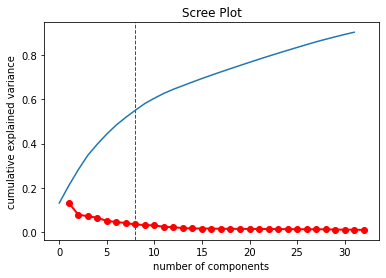

In [131]:
# We may use 8 or 10 principal components as the plots scree rule can be verified thanks to that plot.

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

plt.axvline(linewidth=1, color='r', linestyle = '--', x=8, ymin=0, ymax=1)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [132]:
# Here we can get an idea of the cumulative proportion of variance explained and the correlation with each principal component created.

print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print("Cumulative Prop. Variance Explained: ", out_sum)
print('Principal components explained variance:', pca.explained_variance_) 

Proportion of Variance Explained :  [0.13158689 0.07888133 0.07186836 0.06510777 0.05045871 0.04586254
 0.0408902  0.03449803 0.03202591 0.03038351 0.02393459 0.02200986
 0.01844745 0.01638542 0.01631873 0.01591709 0.01510895 0.01496538
 0.01447098 0.01437158 0.01425496 0.01409737 0.01362523 0.01338247
 0.01317123 0.01297986 0.01282468 0.01256321 0.01157935 0.01096627
 0.01087785 0.00992121]
Cumulative Prop. Variance Explained:  [0.13158689 0.21046822 0.28233658 0.34744435 0.39790307 0.4437656
 0.4846558  0.51915383 0.55117974 0.58156325 0.60549784 0.6275077
 0.64595514 0.66234057 0.6786593  0.69457639 0.70968534 0.72465072
 0.73912169 0.75349327 0.76774824 0.78184561 0.79547084 0.80885331
 0.82202453 0.83500439 0.84782907 0.86039228 0.87197163 0.8829379
 0.89381576 0.90373697]
Principal components explained variance: [0.72996609 0.4375869  0.39868309 0.36117933 0.27991503 0.25441817
 0.22683462 0.19137463 0.17766075 0.16854969 0.13277495 0.12209764
 0.10233551 0.09089662 0.09052667 0.

In [133]:
# As previously mentioned, we can choose 8 principal components out of the original 32 and still explain 70%+ of the variance of the original sample.
# Here, the original dataframe dfdummyX its used to extract the 8 principal components out of the already transformed dummy variables

n_components = 8

pca = PCA(n_components = n_components)

Principal_components=pca.fit_transform(dfdummyX)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pca_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.221483,0.030754,-0.372798,-0.523811,-0.432468,0.835151,-0.478203,-0.471696
1,-0.841072,0.310283,-0.083248,-0.153527,0.937717,-0.340908,-0.260288,-0.086109
2,-0.176472,-1.019925,0.204065,0.969092,-0.686979,0.263844,-0.044614,0.409791


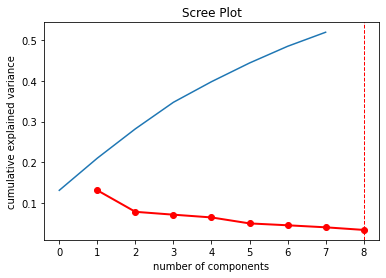

In [134]:

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

plt.axvline(linewidth=1, color='r', linestyle = '--', x=8, ymin=0, ymax=1)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [135]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index=dfdummyX.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Alcohol Involved,0.016218,-0.050294,-0.005488,0.092540,0.010278,-0.011913,1.942880e-02,0.005080
Drug Involved,-0.000214,-0.007902,0.001557,0.009547,0.002816,-0.001391,2.172523e-03,-0.002632
Fell Asleep,-0.000389,-0.009831,0.008492,0.005985,-0.002809,-0.006753,3.686245e-03,0.002844
Cyclist Involved,-0.015789,-0.005078,-0.011840,-0.011095,0.004815,0.000856,-4.728932e-03,-0.012368
Pedestrian Involved,0.008328,0.028577,-0.054401,0.018876,0.030314,0.004628,-1.770989e-02,-0.049419
Motorcycle Involved,-0.018920,-0.007446,0.006599,-0.006721,-0.000536,-0.008241,-7.111108e-03,0.011088
Month_0,0.051526,0.001594,-0.007928,0.026494,0.001244,-0.005316,2.098965e-02,-0.005951
Month_1,0.029038,-0.000218,0.003585,0.010376,0.004236,-0.006289,3.670530e-02,0.004804
Month_2,0.012575,0.009206,0.001722,-0.010994,0.000985,-0.001715,-1.443824e-03,-0.001515
Month_3,-0.015934,0.003177,0.003355,-0.024834,0.001901,0.000521,7.848286e-03,-0.003874


In [136]:
# Split the dfcatX in two equal parts
pcaX_train, pcaX_test, pcay_train, pcay_test = train_test_split(pca_df, dfy, test_size=0.3, random_state=123)

In [137]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB_pca = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=3,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB_pca.fit(pcaX_train, pcay_train)

gs_NB_pca.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.0s finished


{'var_smoothing': 0.1873817422860384}

In [138]:
# save the model to disk
filename = 'drive/MyDrive/ColabNotebooks/models/naiveBayesClassifier/dummy_nbc_gs.pkl'
pickle.dump(gs_NB_pca, open(filename, 'wb'))

In [145]:
# load the model from disk
gs_NB_pca = pickle.load(open(filename, 'rb'))
result = gs_NB_pca.score(pcaX_test, pcay_test)
print(result)

0.582852581546388


In [146]:
# Train the model using X and y train sets.
# After that, predict using X test set as input and getting y_pred new variable as output.
pcay_pred = gs_NB_pca.fit(pcaX_train, pcay_train).predict(pcaX_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.1s finished


In [147]:
# Now, we use scikit-learn metrics module for accuracy calculation using y_test and y_pred as parameters.

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(pcay_test, pcay_pred))

#Accuracy: 0.582852581546388

Accuracy: 0.582852581546388


In [149]:
conf_matrix_baseline = pd.DataFrame(confusion_matrix(pcay_test, pcay_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
# display(gs_NB.score(pcaX_test, pcay_test))


# 	predicted 0	predicted 1
# actual 0	11200	3805
# actual 1	7692	4864
# 0.582852581546388

,predicted 0,predicted 1
actual 0,11199,3806
actual 1,7691,4865


## Mixed Naive Bayes Classifier: MinMax scaled variables - 65.22%

In [52]:
# Create an instance of the Mixed Naive Bayes Classifier and train the model using the scaled train set.
# After the odel is trained, we can create a prediction using the scaled test set.
clf = MixedNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)

[]


In [53]:

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6522259714814411


In [54]:
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display(clf.score(X_test, y_test))

,predicted 0,predicted 1
actual 0,9677,308
actual 1,6082,2307


0.6522259714814411

## Mixed Naive Bayes Classifier: dummy variables - 65.05%

In [55]:
# Create an instance of the Mixed Naive Bayes Classifier and train the model using the dummy train set.
# After the odel is trained, we can create a prediction using the dummy test set.
clf = MixedNB(categorical_features='all')
y_pred = clf.fit(dummyX_train, dummyy_train).predict(dummyX_test)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [57]:

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(dummyy_test, y_pred))

Accuracy: 0.6505932295635136


In [58]:
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display(clf.score(dummyX_test, dummyy_test))

,predicted 0,predicted 1
actual 0,6985,3000
actual 1,3420,4969


0.6505932295635136

## Mixed Naive Bayes Classifier: dummy variables with PCA - 58.26%

In [66]:
# Split the dfcatX in two equal parts
pcaX_train, pcaX_test, pcay_train, pcay_test = train_test_split(pca_df, dfy, test_size=0.3, random_state=123)

In [67]:
clf = MixedNB()
y_pred = clf.fit(pcaX_train, pcay_train).predict(pcaX_test)

[]


In [68]:

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(pcay_test, y_pred))

Accuracy: 0.5822720510866805


In [36]:
conf_matrix_baseline = pd.DataFrame(confusion_matrix(pcay_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display(clf.score(pcaX_test, pcay_test))

# 0.541125924613544 - using pca with 2 components
# 0.577268901979891 - using pca with 8 components
# 0.574212694334942 - using pca with 6 components
# 0.572573858351419 - using pca with 15 components

,predicted 0,predicted 1
actual 0,11085,3920
actual 1,7583,4973


0.5826348826239977